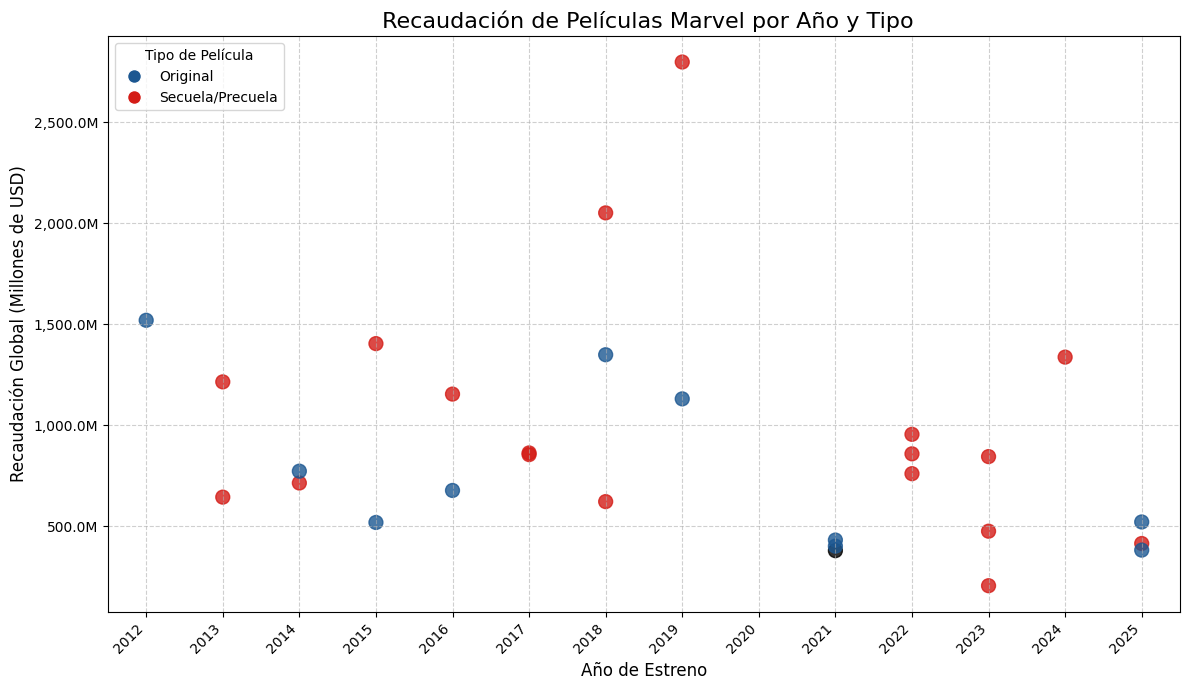

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter


df = pd.read_csv('Marvel_recaudación.csv', sep=';')


df.columns = ['Titulo', 'Anio_Estreno', 'Tipo', 'Recaudacion']


df = df.dropna(subset=['Anio_Estreno', 'Tipo', 'Recaudacion'])
df['Anio_Estreno'] = df['Anio_Estreno'].astype(int)

try:
    df['Recaudacion'] = df['Recaudacion'].astype(float)
except ValueError:

    df['Recaudacion'] = (
        df['Recaudacion']
        .astype(str)
        .str.replace('.', '', regex=False)
        .astype(float)
    )


df['Tipo_Limpio'] = df['Tipo'].str.strip()
color_map = {
    'Original': '#1c5791',
    'Secuela': '#D41C16',
    'Secuela/Precuela': '#D41C16'
}
df['Color'] = df['Tipo_Limpio'].map(color_map).fillna('#000000')



plt.figure(figsize=(12, 7))



scatter = plt.scatter(
    df['Anio_Estreno'],
    df['Recaudacion'] / 1_000_000,
    c=df['Color'],
    s=100,
    alpha=0.8
)



plt.title(' Recaudación de Películas Marvel por Año y Tipo', fontsize=16)
plt.xlabel('Año de Estreno', fontsize=12)
plt.ylabel('Recaudación Global (Millones de USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)



def millones_formatter_decimal(x, pos):

    return f'{x:,.1f}M'

formatter = FuncFormatter(millones_formatter_decimal)
plt.gca().yaxis.set_major_formatter(formatter)



min_year = df['Anio_Estreno'].min()
max_year = df['Anio_Estreno'].max()
plt.xticks(np.arange(min_year, max_year + 1), rotation=45, ha='right')
plt.xlim(min_year - 0.5, max_year + 0.5)


legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Original',
               markerfacecolor='#1c5791', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Secuela/Precuela',
               markerfacecolor='#D41C16', markersize=10)
]
plt.legend(handles=legend_elements, title='Tipo de Película', loc='upper left')

plt.tight_layout()
plt.show()